# 1. Create the master bias and master flat

In [1]:
%pylab inline

from core import *

from scipy.ndimage import median_filter as mf
from george import GP, HODLRSolver
from george.kernels import ExpSquaredKernel

Populating the interactive namespace from numpy and matplotlib


## Create the master bias

#### Create the 2D master bias frames

In [2]:
#bias-ccd respone to np light, constant in y direction

In [3]:
b1 = dstack([pf.getdata(bias,1) for bias in l_bias])
b2 = dstack([pf.getdata(bias,2) for bias in l_bias])

b2d = [median(b1,2), median(b2,2)]

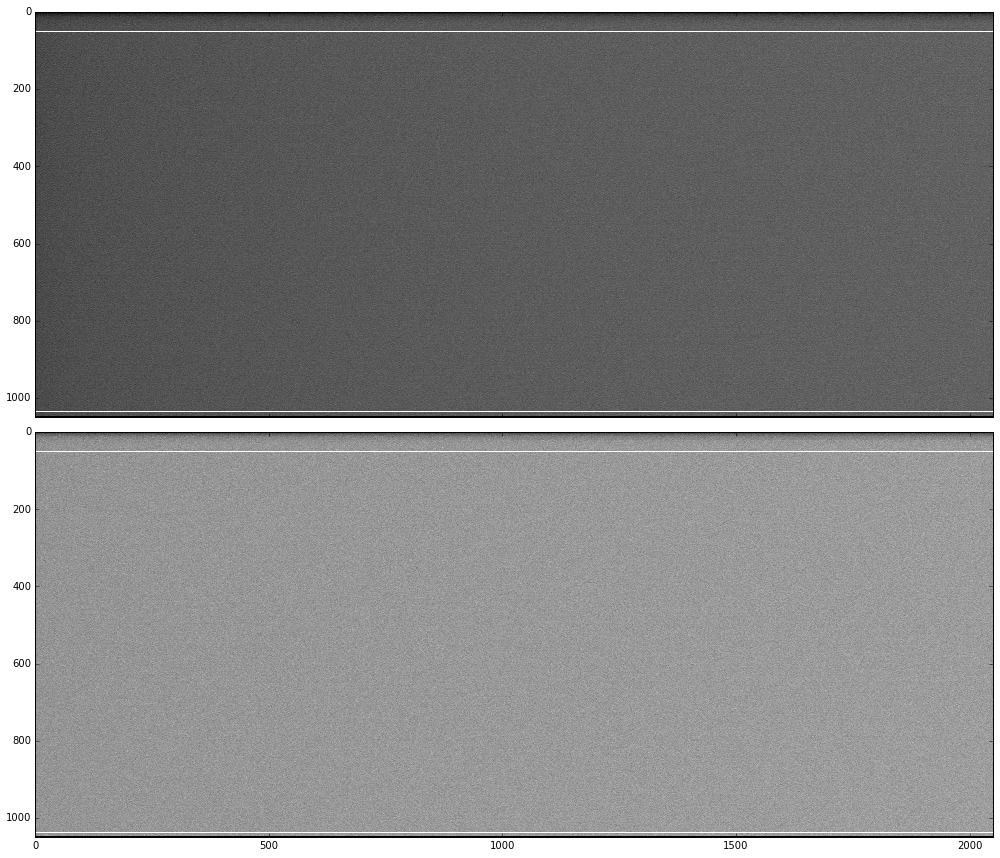

In [4]:
fig,ax = subplots(2,1,figsize=(14,12), sharex=True)
ax[0].imshow(b2d[0].T, cmap=cm.gray, interpolation='nearest', vmin=1200, vmax=1260, aspect='auto');
ax[1].imshow(b2d[1].T, cmap=cm.gray, interpolation='nearest', vmin=1040, vmax=1080, aspect='auto');
[a.axhline(bias_window[1].start, c='w') for a in ax]
[a.axhline(bias_window[1].stop, c='w') for a in ax]
fig.tight_layout()

#### Create the 1D bias curves

In [5]:
b1d_raw = [b.mean(1) for b in b2d]
bmean   = [b.mean() for b in b1d_raw]

x = arange(b1d_raw[0].size)
gp = GP(ExpSquaredKernel(750), solver=HODLRSolver)
gp.compute(x, 1e-1)

b1d_denoised = [gp.predict(br-bm,x,mean_only=True)+bm for br,bm in zip(b1d_raw,bmean)]

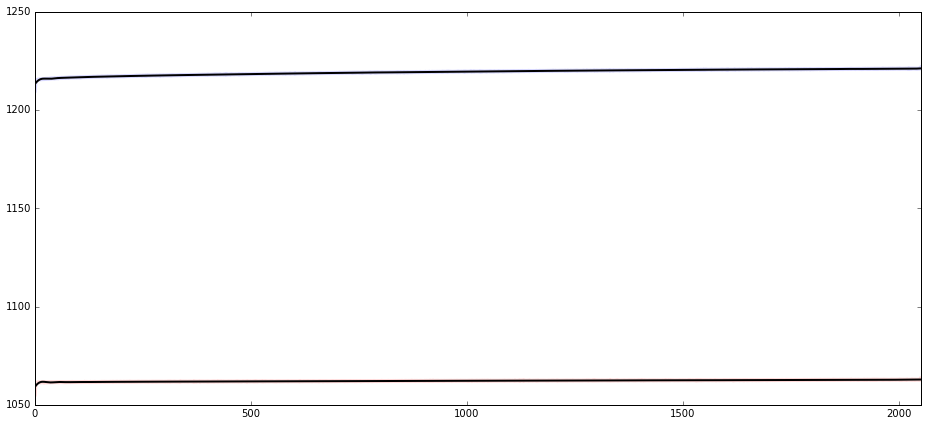

In [6]:
fig,ax = subplots(1,1,figsize=(13,6))
for br,bd in zip(b1d_raw, b1d_denoised):
    ax.plot(br, lw=4, alpha=0.15)
    ax.plot(bd, lw=2, c='k')
setp(ax, xlim=(0,x.size))
fig.tight_layout()

In [7]:
savez(join(reddir,'bias_y'), ccd1_raw=b1d_raw[0], ccd2_raw=b1d_raw[1], 
      ccd1_denoised=b1d_denoised[0], ccd2_denoised=b1d_denoised[1])

## Create the master flat

In [8]:
#flat- variation in pixel sensitivity across ccd (2Dimensional)

In [9]:
flats_ccd1 = dstack([pf.getdata(flat,1) for flat in l_flat])
flats_ccd2 = dstack([pf.getdata(flat,2) for flat in l_flat])

In [10]:
flat_ccd1 = flats_ccd1.mean(2)
flat_ccd2 = flats_ccd2.mean(2)

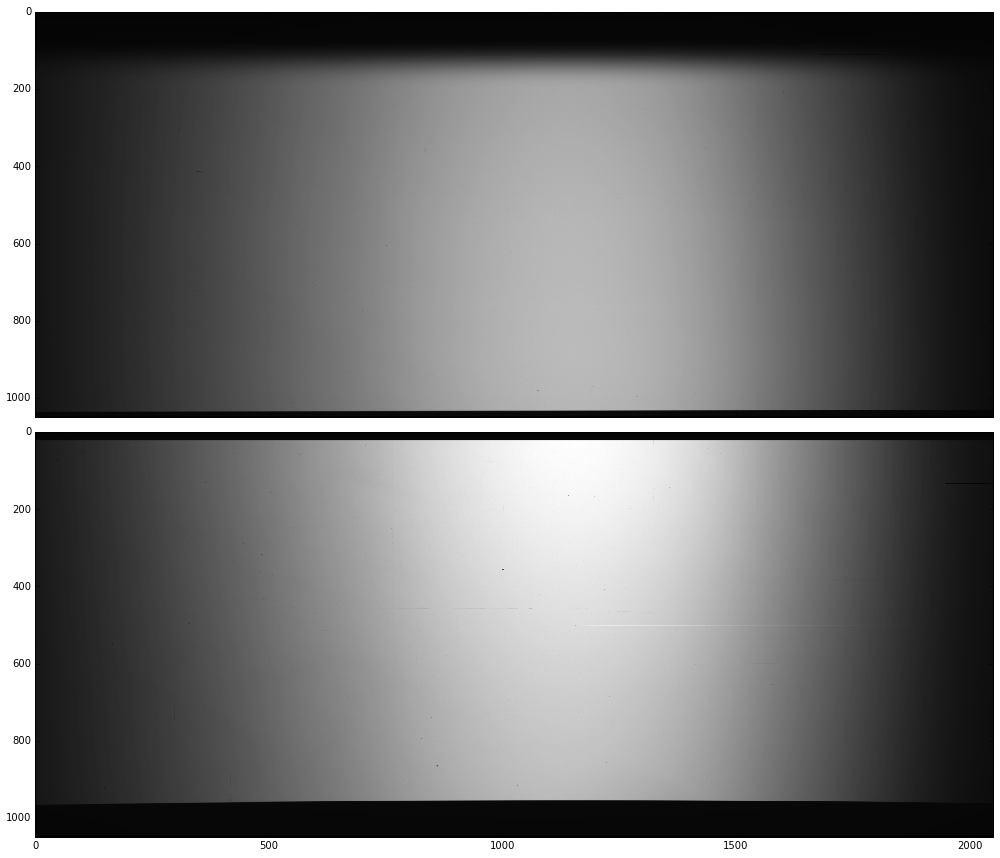

In [11]:
fig,ax = subplots(2,1,figsize=(14,12), sharex=True)
ax[0].imshow(flat_ccd1.T, cmap=cm.gray, interpolation='nearest', aspect='auto');
ax[1].imshow(flat_ccd2.T, cmap=cm.gray, interpolation='nearest', aspect='auto');
fig.tight_layout()

In [12]:
savez(join(reddir,'masterflats'),flat_ccd1=flat_ccd1, flat_ccd2=flat_ccd2)

[]